In [2]:
# Libraries 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from datetime import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the dataset 
df_energy = pd.read_csv("energydata_complete.csv")
len(df_energy)

19735

### Dataset

The data set contains information about energy consumpotion. It is at 10 min for about 4.5 months. Date, weather, temperature, humidity were also collected at regular intervals. Dataset contains 28 columns and 19735 rows.

In [4]:
# Top 5 rows
df_energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
df_energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
# Creating a copy
df = df_energy.copy()

In [6]:
# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

In [7]:
# Convert 'date' column to datetime type
df['year']= df['date'].dt.year 
df['month']= df['date'].dt.month
df['weekday'] = df['date'].dt.weekday
df['day']= df['date'].dt.day
df['hour'] = df['date'].dt.hour

In [9]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month,weekday,day,hour
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,3.333333,23.666667,13.333333,43.096812,43.096812,2016,5,4,27,17
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,3.500000,24.500000,13.300000,49.282940,49.282940,2016,5,4,27,17
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,3.666667,25.333333,13.266667,29.199117,29.199117,2016,5,4,27,17
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,3.833333,26.166667,13.233333,6.322784,6.322784,2016,5,4,27,17
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,4.000000,27.000000,13.200000,34.118851,34.118851,2016,5,4,27,18


### Exploratory Data Analysis

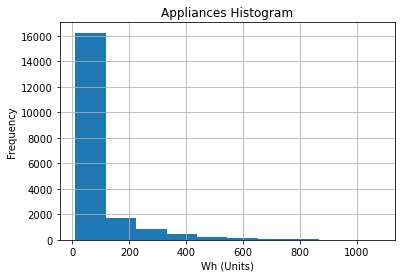

In [9]:
# Plotting the distribution of the appliances (energy consumption)
df['Appliances'].hist()
plt.title("Appliances Histogram")
plt.xlabel("Wh (Units)")
plt.ylabel("Frequency");

The histogram above shows thats the appliance distribution is rightly skewed with majority of energy consumption between 10 and 100

In [10]:
# Month and Appliances
df['Appliances'].corr(df['month'])

-0.011605839998798231

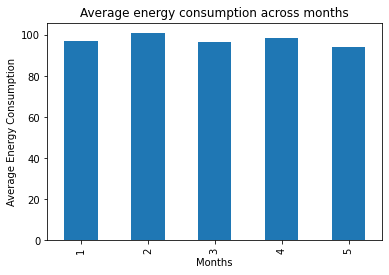

In [12]:
# Bar plot of Average energy consumption across months
df['Appliances'].groupby(df['month']).mean().plot(kind="bar")
plt.title("Average energy consumption across months")
plt.xlabel("Months")
plt.ylabel("Average Energy Consumption");

Looking at the average energy consumption across months, there's little differences in the month. Energy consumption have been similar across all 5 months. The correlation also shows a 1.1% negative correlation, a negligle correlation

In [11]:
# Hour and Appliances
df['Appliances'].corr(df['hour'])

0.21679158849023897

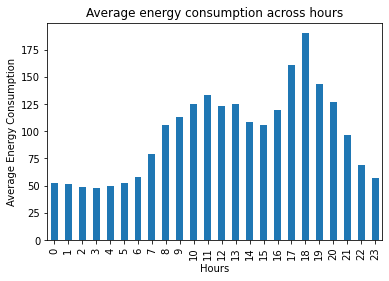

In [15]:
# Bar plot of Average energy consumption across hours
df['Appliances'].groupby(df['hour']).mean().plot(kind="bar")
plt.title("Average energy consumption across hours")
plt.xlabel("Hours")
plt.ylabel("Average Energy Consumption");

From this barplot, we notice there are considerable differences in the pattern of energy used at different hours. There's a peak of energy consumption at 17:00 hours to 19:hours. The highest peak at 18:00. This could be due to people returning from work, warming up their homes and cooking their meals.

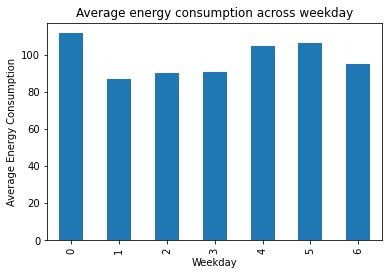

In [18]:
# Bar plot of Average energy consumption across weekdays
df['Appliances'].groupby(df['weekday']).mean().plot(kind="bar")
plt.title("Average energy consumption across weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Energy Consumption");

There's little difference in the pattern of energy consumption on weekdays. Highest peak happens on monday and lowest on tuesday.
0 - 6 refers to mondays to sundays respectively.

In [19]:
# Resampling the dataset, set 'date' column as the index
df.set_index('date', inplace=True)

# Resample the data to hourly frequency and aggregate by taking the mean
df_daily = df.resample('H').mean()

In [20]:
len(df_daily)

3290

In [16]:
df_daily.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month,weekday,day,hour
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,...,6.166667,53.416667,5.050000,26.823044,26.823044,2016.0,1.0,0.0,11.0,17.0
2016-01-11 18:00:00,176.666667,51.666667,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,...,5.416667,40.000000,4.658333,22.324206,22.324206,2016.0,1.0,0.0,11.0,18.0
2016-01-11 19:00:00,173.333333,25.000000,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,...,6.000000,40.000000,4.391667,33.734932,33.734932,2016.0,1.0,0.0,11.0,19.0
2016-01-11 20:00:00,125.000000,35.000000,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,...,6.000000,40.000000,4.016667,25.679642,25.679642,2016.0,1.0,0.0,11.0,20.0
2016-01-11 21:00:00,103.333333,23.333333,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,...,6.000000,40.000000,3.816667,18.826274,18.826274,2016.0,1.0,0.0,11.0,21.0


In [21]:
plt.figure(figsize=(12, 8))
corr = df_daily.select_dtypes("number").corr()
corr

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month,weekday,day,hour
Appliances,1.000000,0.261794,0.074464,0.124464,0.155150,-0.068758,0.116838,0.053693,0.055205,0.023247,...,0.112477,-0.003380,0.021073,-0.022951,-0.022951,NaN,-0.013179,0.004397,0.004328,0.274622
lights,0.261794,1.000000,-0.026813,0.126733,-0.005890,0.059116,-0.111662,0.151652,-0.009062,0.131232,...,0.069831,0.023114,-0.041437,0.005734,0.005734,NaN,-0.206002,-0.114685,-0.047876,0.293839
T1,0.074464,-0.026813,1.000000,0.165936,0.838470,-0.002162,0.893731,-0.028615,0.878618,0.098747,...,-0.088512,-0.080553,0.573135,-0.014101,-0.014101,NaN,0.707024,0.001691,-0.126291,0.179414
RH_1,0.124464,0.126733,0.165936,1.000000,0.273126,0.802405,0.256216,0.853102,0.108033,0.889096,...,0.208679,-0.023672,0.645987,-0.003107,-0.003107,NaN,-0.094323,-0.054071,-0.041247,0.019148
T2,0.155150,-0.005890,0.838470,0.273126,1.000000,-0.163754,0.737472,0.122056,0.764181,0.232799,...,0.052163,-0.074087,0.584871,-0.026987,-0.026987,NaN,0.534957,0.000896,-0.156380,0.255676
RH_2,-0.068758,0.059116,-0.002162,0.802405,-0.163754,1.000000,0.138189,0.681418,-0.046707,0.724197,...,0.071092,-0.005989,0.501625,0.014371,0.014371,NaN,-0.098052,-0.044342,0.037463,-0.183882
T3,0.116838,-0.111662,0.893731,0.256216,0.737472,0.138189,1.000000,-0.012625,0.854894,0.123753,...,-0.101708,-0.108006,0.647915,-0.011922,-0.011922,NaN,0.791293,-0.017224,-0.076459,0.038175
RH_3,0.053693,0.151652,-0.028615,0.853102,0.122056,0.681418,-0.012625,1.000000,-0.140727,0.902182,...,0.266471,0.018327,0.416236,-0.000975,-0.000975,NaN,-0.415296,-0.035210,-0.048370,-0.052404
T4,0.055205,-0.009062,0.878618,0.108033,0.764181,-0.046707,0.854894,-0.140727,1.000000,-0.048021,...,-0.187783,-0.110859,0.521371,-0.004940,-0.004940,NaN,0.790394,-0.090843,-0.121339,0.088929
RH_4,0.023247,0.131232,0.098747,0.889096,0.232799,0.724197,0.123753,0.902182,-0.048021,1.000000,...,0.303228,0.002318,0.618102,-0.004321,-0.004321,NaN,-0.257790,-0.005546,-0.004884,-0.018705


<Figure size 864x576 with 0 Axes>

In [22]:
# Separate the features and the target variable
X = df_daily.drop(columns=['Appliances','rv1','rv2','year','month',], axis=1)  # Features
y = df_daily['Appliances']  # Target variable

In [23]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [65]:
# Perform feature selection using SelectKBest and f_regression
selector = SelectKBest(score_func=f_regression, k=20)  # Select top 3 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [66]:
# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()]
selected_feature_names

Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T6',
       'RH_6', 'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'hour'],
      dtype='object')

In [67]:
# Create and fit a linear regression model using the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test_selected)[:5]

## Model Evaluation

In [68]:
# Evaluate the model on the test set
score = model.score(X_test_selected, y_test)
print("R-squared score:", score)

R-squared score: 0.2777454271637467


In [29]:
# Baseline
y_mean = y_train.mean() 
y_pred_baseline = [y_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean P2 Reading:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean P2 Reading: 97.82
Baseline MAE: 56.31


In [30]:
y_pred_training = model.predict(X_train_selected)
print("Training MAE:", mean_absolute_error(y_train, y_pred_training))

Training MAE: 45.45714689602642


In [27]:
y_pred_test = model.predict(X_test_selected)
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))

Test MAE: 44.62294013155584


In [31]:
# Evaluate the performance of the best model
mse = mean_squared_error(y_test, model.predict(X_test_selected))
print("Mean Squared Error:", mse)

Mean Squared Error: 4651.482106089801


# Random Forest Regression

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
selector = SelectKBest(score_func=f_regression, k=16)  # Select top 2 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
selected_feature_names = X.columns[selector.get_support()]

# Create a Random Forest regression model
model1 = RandomForestRegressor(random_state=42)

# Train the model
model1.fit(X_train_selected, y_train)

# Make predictions on the test set
predictions = model1.predict(X_test_selected)

In [33]:
# Evaluate the model on the test set
score = model1.score(X_test_selected, y_test)
print("R-squared score:", score)

R-squared score: 0.4696089067513417


In [34]:
y_pred_training = model1.predict(X_train_selected)
print("Training MAE:", mean_absolute_error(y_train, y_pred_training))

Training MAE: 13.318906900821796


In [35]:
y_pred_test = model1.predict(X_test_selected)
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))

Test MAE: 35.472036474164135


In [36]:
# Evaluate the performance of the best model
mse = mean_squared_error(y_test, model1.predict(X_test_selected))
print("Mean Squared Error:", mse)

Mean Squared Error: 3415.8380884836206


# Decision Tree Regressor

In [37]:
from sklearn.tree import DecisionTreeRegressor

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
selector = SelectKBest(score_func=f_regression, k=2)  # Select top 2 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
selected_feature_names = X.columns[selector.get_support()]

# Create a Random Forest regression model
model2 = DecisionTreeRegressor(random_state=42)

# Train the model
model2.fit(X_train_selected, y_train)

# Make predictions on the test set
predictions = model2.predict(X_test_selected)

In [38]:
# Evaluate the model on the test set
score = model2.score(X_test_selected, y_test)
print("R-squared score:", score)

R-squared score: 0.13036345529152893


In [39]:
y_pred_training = model2.predict(X_train_selected)
print("Training MAE:", mean_absolute_error(y_train, y_pred_training))

Training MAE: 38.32599869011514


In [41]:
y_pred_test = model2.predict(X_test_selected)
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))

Test MAE: 45.948953059608336


In [38]:
# Evaluate the performance of the best model
mse = mean_squared_error(y_test, model2.predict(X_test_selected))
print("Mean Squared Error:", mse)

Mean Squared Error: 5600.655196447342


# Support Vector

#{k: v for k, v in sorted(dicta.items(), key=lambda item: item[1])}

In [51]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#  Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Data Preprocessing
selector = SelectKBest(score_func=f_regression, k=3)  # Select top 2 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
selected_feature_names = X.columns[selector.get_support()]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Create an instance of the Support Vector Regressor
model3 = SVR()

# Fit the model to the scaled training data
model3.fit(X_train_scaled, y_train)


# Use the trained model to make predictions on the scaled testing data
y_pred = model3.predict(X_test_scaled)

In [52]:
# Evaluate the model on the test set
score = model3.score(X_test_selected, y_test)
print("R-squared score:", score)

R-squared score: -0.06630154103155017


In [53]:
y_pred_training = model3.predict(X_train_selected)
print("Training MAE:", mean_absolute_error(y_train, y_pred_training))

Training MAE: 49.90109626181469


In [54]:
y_pred_test = model3.predict(X_test_selected)
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))

Test MAE: 50.22578428910832


In [55]:
# Evaluate the performance of the best model
mse = mean_squared_error(y_test, model3.predict(X_test_selected))
print("Mean Squared Error:", mse)

Mean Squared Error: 6867.222063166805


# Gradient Boosting Regression

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

#  Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create an instance of the GradientBoostingRegressor
model4 = GradientBoostingRegressor(random_state=42)

# Define the hyperparameters and their respective values to search over
param_grid = {
    'n_estimators': [20, 30, 40],  # Number of boosting stages
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'max_depth': [3, 4, 5],  # Maximum depth of each tree
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider at each split
}

# Perform grid search using cross-validation to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=model4, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'n_estimators': 40}


In [60]:
# Train the model with the best hyperparameters
best_model = GradientBoostingRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4056.2252140341297


In [61]:
# Evaluate the model on the test set
score = best_model.score(X_test, y_test)
print("R-squared score:", score)

R-squared score: 0.3701733893688762


In [62]:
y_pred_training = best_model.predict(X_train)
print("Training MAE:", mean_absolute_error(y_train, y_pred_training))

Training MAE: 30.476955770305167


In [63]:
y_pred_test = best_model.predict(X_test)
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))

Test MAE: 38.585400009138674


## Discussion

To determine the best model for prediction, we need to consider multiple evaluation metrics, such as R-squared score, mean absolute error (MAE), and mean squared error (MSE). Additionally, it's important to assess the suitability of each model for the specific dataset.

Linear Regression:
* R-squared score: 28%
* MAE: 44
* MSE: 4651

Random Forest Regressor:
* R-squared score: 47%
* MAE: 35
* MSE: 3415

Decision Tree Regressor:
* R-squared score: 13%
* MAE: 45
* MSE: 5600

Support Vector Regressor:
* R-squared score: -6%
* MAE: 50
* MSE: 6867

Gradient Boosting Regressor:
* R-squared score: 37%
* MAE: 38
* MSE: 4056

**Comparing the models:**

R-squared score: The R-squared score indicates the proportion of variance in the target variable explained by the model. Higher R-squared values indicate better performance. Based on the scores, the Random Forest Regressor performs the best with a score of 47%, followed by the Gradient Boosting Regressor (37%), Linear Regression (27%), Decision Tree Regressor (13%), and Support Vector Regressor (-6%). The Support Vector regressor negative scores indicates that the model doesn't fit the data properly, indicating that the SVR has no significant predictive power and performs poorly than the baseline model (assuming a mean value for a predictions).

Mean Absolute Error (MAE): MAE represents the average absolute difference between the predicted and actual values. Lower MAE values indicate better accuracy. The Random Forest Regressor has the lowest MAE of 35, followed by the Gradient Boosting Regressor (38), Linear Regression (44), Decision Tree Regressor (45), and Support Vector Regressor (50).

Mean Squared Error (MSE): MSE calculates the average squared difference between the predicted and actual values. Smaller MSE values indicate better precision. The Random Forest Regressor achieves the lowest MSE of 3415, followed by the Gradient Boosting Regressor (4056), Linear Regression (4651), Decision Tree Regressor (5600), and Support Vector Regressor (6867).

Based on the overall performance and comparison of the models, the Random Forest Regressor appears to be the best model for prediction. It achieves the highest R-squared score, lowest MAE, and lowest MSE among the 5 models evaluated. Random Forests tend to be robust, handle non-linear relationships well, and can capture complex interactions among variables. The Linear Regression model is also suitable for prediciting energy consumption given the available dataset.










